**Dataset Link:** https://www.kaggle.com/datasets/kukuroo3/body-performance-data

**Step - 0:** 


---



The main problem that we are trying to solve using the above dataset is to predict the performance of the athelete's body based on different attributes like age, height, weight and different body excercies like broad jump, sit ups etc.,

**Step - 1.1: Dataset**


---

The dataset is picked from Kaggle public datasets. And it is related to korean sport atheltes body performance. The dataset has many versions and there is definitely a possibility of change as the dataset is updated regularly. And it has protected features as well.

**Step - 1.2: Machine Learning Metrics**


---


Some of the machine learning metrics that could be used to evaluate the machine learning model that is used to solve this problem are **Precision, Recall, Fairness, Accuracy, F1 score**.

**Step - 1.3: Business Metrics**


---


1. One business metric would be customer experience as based on our machine learning model prediction people can engage more to understand about their body performance which is very crucial now a days.
2. Second possible business metric would be revenue. By using our machine learning model as central focus we can build an mobile application that is easily accessible which can lead to profits. Basically this model and application can be used in different sports for measuring body performance.

**Step - 1.4: Software Metrics**

---



Some of the software metrics that could be used to analyse the model are Throughput, scalability, availablity, latency. As we will be using tensorflow extended which can though of as a cloud based machine learing deployment of the model. So we can have better throughput, and availability. And we can scale the model very quickly by just changing the few parameters

**Step - 2.1: Dataset Objective**


---


The main objective of the dataset is to measure the performance of the human body based on different features like age, height, weight etc.,

The main features that made me select this particular dataset are firstly age, height, weight as these are important factors that contribute to the human body performance. Generally, the initial hypothesis is that the performance of the body decreases with increase in age and weight. But there could be other factors that can be considered like the individual excercise habits. The dataset contains this key information as well like situp count, gripforce, broad jump etc., These features combinely made me select this dataset. 

**Step - 2.2: Quality of Dataset Using Radar Chart**



---



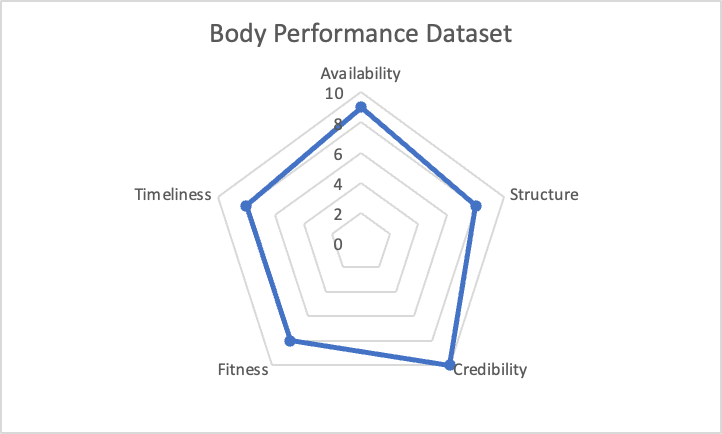

**Availability:** The availability of the data is marked as 9 because the dataset was update recently and there is a possibility of updating it more data frequently.

**Timeliness:** The timeliness is also marked as 9 becuase of the fact that data is arrving reguarly on time.

**Structure:** The structure of the dataset is also good as the data is clear and understandable. Also it is easy to understand each and every data point just based on the feature name.

**Fitness:** The fitness is also good enough as most of the features are relavant enough to predict the target variable.

**Credibility:** credibility is also marked well as the dataset was taken from credible korean sports foundation to measure the body performance of the player.

In [45]:
import pandas as pd
import numpy as np 
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [7]:
pip install neptune-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install scikit-learn neptune-client neptune-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import neptune.new as neptune
from neptune.new.types import File

run = neptune.init(
    project="saivikaschinthirla/5901-Project",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJhYmJmNTE1Zi00Y2M5LTQxODYtYTUwZi02ZmRiNTBjMDQzN2YifQ==",
)

https://app.neptune.ai/saivikaschinthirla/5901-Project/e/PROJ-3


Info (NVML): Driver Not Loaded. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/you-should-know/what-can-you-log-and-display#hardware-consumption


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [46]:
train_data = pd.read_csv("bodyPerformance.csv")

In [47]:
train_data.shape

(13393, 12)

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body_fat_percent         13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit_and_bend_forward_cm  13393 non-null  float64
 9   sit-ups_counts           13393 non-null  float64
 10  broad_jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.2+ MB


**Step - 2.2: Dataset Pushed to GIT Using GIT LFS:**

GIT LINK FOR DATASET: https://github.com/VikCodes7/SalaryDataset.git

**Step - 3: Features and Target Variables**


---


**Features:**
In the selected dataset the features are age, gender, height_cm, weight_kg, body_fat_percent, diastolic, systolic, gripForce, sit_and_bend_forward_cm, sit-ups_counts, broad_jump_cm

**Target Variable:** In the selected dataset the target variable is class which represents various body performance classess. In this it is represented using Class A, B, C and D. After analysing the dataset changed the clases to just A and C.

In [49]:
train_data.head(10)

age gender  height_cm  weight_kg  body_fat_percent  diastolic  systolic  \
0   27      M      172.3      75.24              21.3       80.0     130.0   
1   25      M      165.0      55.80              15.7       77.0     126.0   
2   31      M      179.6      78.00              20.1       92.0     152.0   
3   32      M      174.5      71.10              18.4       76.0     147.0   
4   28      M      173.8      67.70              17.1       70.0     127.0   
5   36      F      165.4      55.40              22.0       64.0     119.0   
6   42      F      164.5      63.70              32.2       72.0     135.0   
7   33      M      174.9      77.20              36.9       84.0     137.0   
8   54      M      166.8      67.50              27.6       85.0     165.0   
9   28      M      185.0      84.60              14.4       81.0     156.0   

   gripForce  sit_and_bend_forward_cm  sit-ups_counts  broad_jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     A  
4       43.5                     27.1            45.0          217.0     A  
5       23.8                     21.0            27.0          153.0     A  
6       22.7                      0.8            18.0          146.0     C  
7       45.9                     12.3            42.0          234.0     A  
8       40.4                     18.6            34.0          148.0     C  
9       57.9                     12.1            55.0          213.0     A

In [50]:
train_data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body_fat_percent           0
diastolic                  0
systolic                   0
gripForce                  0
sit_and_bend_forward_cm    0
sit-ups_counts             0
broad_jump_cm              0
class                      0
dtype: int64

In [51]:
# target_variable = train_data["class"]
train_data['performance_class'] = train_data['class']
train_data = train_data.drop(columns=['class'])
train_data.performance_class = train_data.performance_class.map( {'A':0 , 'C':1} )
target_variable = train_data["performance_class"]
train_data = train_data.drop(columns=["performance_class"])

In [52]:
train_data.head()

age gender  height_cm  weight_kg  body_fat_percent  diastolic  systolic  \
0   27      M      172.3      75.24              21.3       80.0     130.0   
1   25      M      165.0      55.80              15.7       77.0     126.0   
2   31      M      179.6      78.00              20.1       92.0     152.0   
3   32      M      174.5      71.10              18.4       76.0     147.0   
4   28      M      173.8      67.70              17.1       70.0     127.0   

   gripForce  sit_and_bend_forward_cm  sit-ups_counts  broad_jump_cm  
0       54.9                     18.4            60.0          217.0  
1       36.4                     16.3            53.0          229.0  
2       44.8                     12.0            49.0          181.0  
3       41.4                     15.2            53.0          219.0  
4       43.5                     27.1            45.0          217.0

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = list(train_data.select_dtypes(exclude=numerics).columns)
print(categorical_columns)

['gender']


In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def one_hot_encoding_column(df, one_hot_categ):
    for col in one_hot_categ:
        tmp = pd.get_dummies(df[col], prefix = col)
        df = pd.concat([df, tmp], axis = 1)
    df = df.drop(columns = one_hot_categ)
    return df

In [55]:
train_data_new = one_hot_encoding_column(train_data, categorical_columns)

**Step - 5: Protected Features:** 


---


In the current dataset the protected features are age, and gender.


**Step - 6: Model Building**


---



In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data_new, target_variable, test_size=0.2, random_state=0)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from pprint import pprint
from sklearn.metrics import accuracy_score

classifiers = [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

In [58]:
scaler = StandardScaler()

for classifier in classifiers:
  clf = classifier
  print("Using {} classifier".format(clf))
  X_train_std = scaler.fit_transform(x_train)
  clf.fit(X_train_std, y_train)
  X_test_std = scaler.fit_transform(x_test)
  y_pred = clf.predict(X_test_std)
  print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))

Using RandomForestClassifier() classifier
87.2% accuracy on test set.
Using LogisticRegression() classifier
83.4% accuracy on test set.
Using GradientBoostingClassifier() classifier
86.6% accuracy on test set.
Using DecisionTreeClassifier() classifier
81.4% accuracy on test set.
Using KNeighborsClassifier() classifier
81.9% accuracy on test set.


**Step - 7: Reason for RandomForest Model Selection**

As we know that for a given machine learning model it is difficult to say that this particular model will solve the problem. So in order to overcome this I have used a few classifier models and recursively trained the models on the dataset to know which model performs well on this particular dataset. After training and generating accuracies above I can see that RandomForestClassifier outperformed other models. So going forward We will be picking this model for our dataset.

In [59]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(random_state=0)
rf.fit(scaler.fit_transform(x_train), y_train)
acc = accuracy_score(y_test, rf.predict(scaler.fit_transform(x_test)))

#Applying RFE to select features of most importance
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=2,verbose=1)
rfe.fit(x_train, y_train)
mask = rfe.support_
reduced_X = train_data_new.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 12 features.
Index(['age', 'height_cm', 'weight_kg', 'body_fat_percent', 'diastolic',
       'systolic', 'gripForce', 'sit_and_bend_forward_cm', 'sit-ups_counts',
       'broad_jump_cm'],
      dtype='object')


In [60]:
pprint(dict(zip(x_train.columns, rf.feature_importances_.round(2))))

print("{0:.1%} accuracy on test set.".format(acc))

{'age': 0.09,
 'body_fat_percent': 0.07,
 'broad_jump_cm': 0.08,
 'diastolic': 0.04,
 'gender_F': 0.02,
 'gender_M': 0.01,
 'gripForce': 0.08,
 'height_cm': 0.05,
 'sit-ups_counts': 0.16,
 'sit_and_bend_forward_cm': 0.31,
 'systolic': 0.04,
 'weight_kg': 0.07}
87.4% accuracy on test set.


**Step- 4: Features with most predictive value**

After selecting RandomForestClassifier as our model. I have used RecursiveFeartureElimination(RFE) method to know the most important features of the current dataset. And can see that **'sit and bend forward_cm'** and **'sit-ups counts'** features are the most important features with most predictive value.

**Step - 8: Machine Learning Metrics**

As mentioned earlier some of the machine learning metrics that we use are accuracy which is displayed above and for our model it is just above 81%. And for other metrics like precision, recall etc., below are the numbers generated.

In [61]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1335
           1       0.88      0.74      0.80      1344

    accuracy                           0.82      2679
   macro avg       0.83      0.82      0.82      2679
weighted avg       0.83      0.82      0.82      2679



In [62]:
print(f1_score(y_test, y_pred))

0.8043478260869565


In [63]:
acc = accuracy_score(y_test, y_pred)
print("{0:.1%} accuracy on test set before error analysis.".format(acc))

81.9% accuracy on test set.


**Step - 9: Error Analysis**

From the initial metrics we can see that recall for both the prediction classes is 89 for class A and 74 for class C. And after doing some exploration on the data found that height is in cm and weight is in KGS. so changed the metric of height by dividing by 100. Next, after looking at the wrongly identified samples and analysing distribution graphs of age, diastolic, body_fat columns I can see that most of the data in the distribution is below or above some range. And based on that necesasry new columns of data is created and retrained the model. Then the accuracy of the model got increased by few points of percentage. And also recall percentage for both the classes got increased.

In [66]:
train_data_new['height_cm'] = train_data_new['height_cm'] / 100

In [67]:
results = rf.predict(scaler.fit_transform(x_test))
print(results)


[0 0 0 ... 0 0 1]


In [70]:
wronglyPredictedSamples = x_test[results != y_test]

In [71]:
wronglyPredictedSamples.head()

age  height_cm  weight_kg  body_fat_percent  diastolic  systolic  \
6939    22      170.0       66.6              25.5       56.0     129.0   
12440   42      170.6       63.8              16.3       72.0     120.0   
10855   50      163.6       63.0              30.4       71.0     136.0   
4602    48      174.3       74.3              23.0       73.0     126.0   
2908    58      168.4       69.7              25.7       81.0     134.0   

       gripForce  sit_and_bend_forward_cm  sit-ups_counts  broad_jump_cm  \
6939        28.3                     15.4            57.0          220.0   
12440       61.4                     13.9            47.0          216.0   
10855       28.4                     17.9            40.0          185.0   
4602        44.1                      9.6            37.0          196.0   
2908        37.8                     23.2            31.0          178.0   

       gender_F  gender_M  
6939          0         1  
12440         0         1  
10855         1         0  
4602          0         1  
2908          0         1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


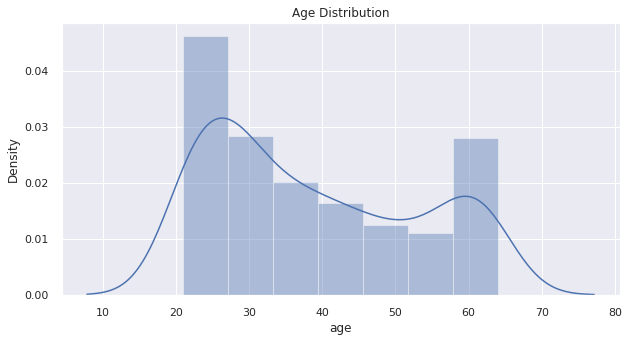

In [72]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(wronglyPredictedSamples['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


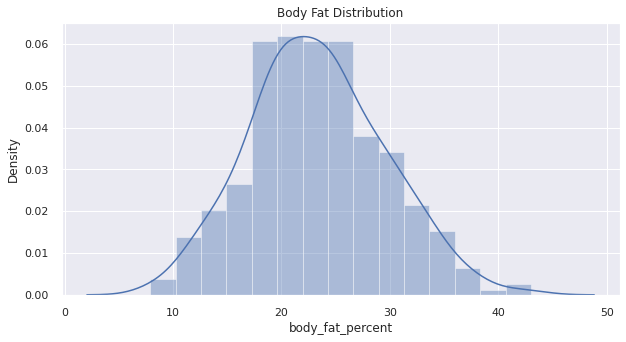

In [73]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title('Body Fat Distribution')
sns.distplot(wronglyPredictedSamples['body_fat_percent'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


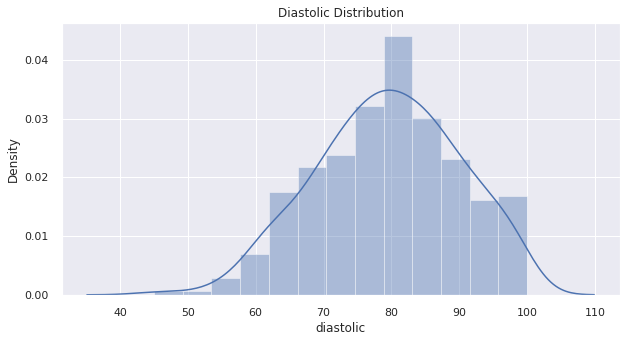

In [74]:
sns.set()
plt.figure(figsize=(10, 5))
plt.title('Diastolic Distribution')
sns.distplot(wronglyPredictedSamples['diastolic'])
plt.show()

In [75]:
def create_age_groups(df, age_limit=30):
  df['AgeGroup'] = np.where(df['age'] < age_limit, 0, 1)
  return df

In [76]:
def create_body_fat_groups(df, age_limit=26):
  df['BodyFatGroup'] = np.where(df['body_fat_percent'] < age_limit, 0, 1)
  return df


def create_diastolic_groups(df, diastolic_limit=72):
  df['DiastolicGroup'] = np.where(df['diastolic'] < diastolic_limit, 0, 1)
  return df

In [77]:
train_data_error_analysis = create_age_groups(train_data_new)
train_data_error_analysis = create_body_fat_groups(train_data_error_analysis)
train_data_error_analysis = create_diastolic_groups(train_data_error_analysis)

In [78]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_data_error_analysis, target_variable, test_size=0.3, random_state=0)

In [79]:
parameters = {'n_estimators': 70,
              'max_depth': 7,
              'min_samples_split': 3}

In [80]:
clf = RandomForestClassifier(**parameters)
clf.fit(scaler.fit_transform(x_train_new), y_train_new)
acc = accuracy_score(y_test_new, clf.predict(scaler.fit_transform(x_test_new)))
print("{0:.1%} accuracy on test set after performing error analysis.".format(acc))

86.0% accuracy on test set after performing error analysis.


In [81]:
run['parameters'] = parameters
y_pred = clf.predict(scaler.fit_transform(x_test_new))

run['scores/max_error'] = max_error(y_test_new, y_pred)
run['scores/mean_absolute_error'] = mean_absolute_error(y_test_new, y_pred)
run['scores/r2_score'] = r2_score(y_test_new, y_pred)

In [82]:
run["train/accuracy"].log(acc)
run["test/mean_absolute_error"].log(mean_absolute_error(y_test_new, y_pred))
run["test/max_error"].log(max_error(y_test_new, y_pred))

In [83]:
import neptune.new.integrations.sklearn as npt_utils

run["cls_summary"] = npt_utils.create_classifier_summary(
    clf, x_train_new, x_test_new, y_train_new, y_test_new
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [84]:
run["confusion-matrix"] = npt_utils.create_confusion_matrix_chart(clf, x_train_new, x_test_new, y_train_new, y_test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [85]:
run["visuals/classification_report"] = \
    npt_utils.create_classification_report_chart(
    clf, x_train_new, x_test_new, y_train_new, y_test_new)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Metrics After Error Analysis**


---



In [86]:
print(classification_report(y_test_new, clf.predict(scaler.fit_transform(x_test_new))))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2005
           1       0.92      0.79      0.85      2013

    accuracy                           0.86      4018
   macro avg       0.87      0.86      0.86      4018
weighted avg       0.87      0.86      0.86      4018



In [88]:
print(f1_score(y_test_new, clf.predict(scaler.fit_transform(x_test_new))))

0.8498402555910542


In [89]:
print(accuracy_score(y_test_new, clf.predict(scaler.fit_transform(x_test_new))))

0.8596316575410652


**Step - 10: Model Fairness Evaluation**

We are doing the fairness evaluation based on protected variable gender which has two values male and female.
As we can see from below model is approximately just above 82% accurate for both males and females. The main reason behind this can be involvment of other features of the dataset as well. Based on the below observation we can say that our model is not biased towards male or female as accuracies are almost similar.

In [90]:
male_dataset = x_test_new[x_test_new['gender_M'] == 1]
female_dataset = x_test_new[x_test_new['gender_F'] == 1]

males_test = y_test_new[x_test_new['gender_M'] == 1]
females_test = y_test_new[x_test_new['gender_F'] == 1]

In [91]:
male_predictions = clf.predict(scaler.fit_transform(male_dataset))
print("{0:.1%} accuracy on males test set.".format(accuracy_score(males_test, male_predictions)))
female_predictions = clf.predict(scaler.fit_transform(female_dataset))
print("{0:.1%} accuracy on females test set.".format(accuracy_score(females_test, female_predictions)))

82.2% accuracy on males test set.
82.0% accuracy on females test set.


In [92]:
train_data_error_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  int64  
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body_fat_percent         13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit_and_bend_forward_cm  13393 non-null  float64
 8   sit-ups_counts           13393 non-null  float64
 9   broad_jump_cm            13393 non-null  float64
 10  gender_F                 13393 non-null  uint8  
 11  gender_M                 13393 non-null  uint8  
 12  AgeGroup                 13393 non-null  int64  
 13  BodyFatGroup             13393 non-null  int64  
 14  DiastolicGroup        

In [93]:
train_data_error_analysis = train_data_error_analysis.astype({"age":'float', "gender_F":'float', "gender_M":'float', "AgeGroup":'float', "BodyFatGroup":'float',"DiastolicGroup":'float'}) 

In [94]:
train_data_error_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body_fat_percent         13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit_and_bend_forward_cm  13393 non-null  float64
 8   sit-ups_counts           13393 non-null  float64
 9   broad_jump_cm            13393 non-null  float64
 10  gender_F                 13393 non-null  float64
 11  gender_M                 13393 non-null  float64
 12  AgeGroup                 13393 non-null  float64
 13  BodyFatGroup             13393 non-null  float64
 14  DiastolicGroup        

**Step - 11: Building pipeline using TFX**

---



In [79]:
try:
  import colab
  !pip install --upgrade pip
except:
  pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [81]:
pip install tfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [95]:
import os
from absl import logging
import urllib.request
import tempfile
import pandas as pd
logging.set_verbosity(logging.INFO)  # Set default logging level.

import tensorflow as tf
%tensorflow_version 2.9.1
print('TensorFlow version: {}'.format(tf.__version__))
from tfx import v1 as tfx
print('TFX version: {}'.format(tfx.__version__))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
TensorFlow version: 2.9.1


INFO:absl:tensorflow_io is not available: No module named 'tensorflow_io'
INFO:absl:tensorflow_ranking is not available: No module named 'tensorflow_ranking'
INFO:absl:tensorflow_text is not available: No module named 'tensorflow_text'
INFO:absl:tensorflow_decision_forests is not available: No module named 'tensorflow_decision_forests'
INFO:absl:struct2tensor is not available: No module named 'struct2tensor'
INFO:absl:tensorflow_text is not available: No module named 'tensorflow_text'


TFX version: 1.9.1


In [96]:
PIPELINE_NAME = "performance_prediction_pipeline"


# PIPELINE_ROOT for output directory to store artifacts generated from the pipeline.
# 3 => CODE HERE # 
PIPELINE_ROOT=os.path.join('pipelines', PIPELINE_NAME)

# METADATA_PATH for storing meta data
# 4 => CODE HERE # 
METADATA_PATH=os.path.join('metdata', PIPELINE_NAME, 'metadata.db')

# SERVING_MODEL_DIR to deploy your model
# 5 => CODE HERE # 
SERVING_MODEL_DIR=os.path.join('serving_model', PIPELINE_NAME)

In [97]:
data = pd.read_csv('bodyPerformance.csv')
data['performance_class'] = data['class']
data = data.drop(columns=['class'])
data.performance_class = data.performance_class.map( {'A':0 , 'C':1} )

train_data_pipeline = one_hot_encoding_column(data, categorical_columns)

train_data_pipeline = create_age_groups(train_data_pipeline)
train_data_pipeline = create_body_fat_groups(train_data_pipeline)
train_data_pipeline = create_diastolic_groups(train_data_pipeline)

In [98]:
train_data_pipeline = train_data_pipeline.astype({"age":'float', "gender_F":'float', "gender_M":'float', "AgeGroup":'float', "BodyFatGroup":'float',"DiastolicGroup":'float'}) 

In [99]:
DATA_ROOT = tempfile.mkdtemp(prefix='tfx-data')  
# Create a temporary directory.

# read your CSV file. Convert column Species from categorical string to int values using a mapping. store the new file in a temporary directory. 
# _data_filepath should point to your converted CSV file
# 6 => CODE HERE #
_data_filepath = os.path.join(DATA_ROOT, "data.csv")
train_data_pipeline.to_csv(_data_filepath)

In [100]:
columns_list = list(data.columns)
print(columns_list)

['age', 'gender', 'height_cm', 'weight_kg', 'body_fat_percent', 'diastolic', 'systolic', 'gripForce', 'sit_and_bend_forward_cm', 'sit-ups_counts', 'broad_jump_cm', 'performance_class']


In [101]:
!head {_data_filepath}

,age,height_cm,weight_kg,body_fat_percent,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,performance_class,gender_F,gender_M,AgeGroup,BodyFatGroup,DiastolicGroup
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1,0.0,1.0,0.0,0.0,1.0
1,25.0,165.0,55.8,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0.0,1.0,0.0,0.0,1.0
2,31.0,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1,0.0,1.0,1.0,0.0,1.0
3,32.0,174.5,71.1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,0.0,1.0,1.0,0.0,1.0
4,28.0,173.8,67.7,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,0.0,1.0,0.0,0.0,0.0
5,36.0,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,0,1.0,0.0,1.0,0.0,0.0
6,42.0,164.5,63.7,32.2,72.0,135.0,22.7,0.8,18.0,146.0,1,1.0,0.0,1.0,1.0,1.0
7,33.0,174.9,77.2,36.9,84.0,137.0,45.9,12.3,42.0,234.0,0,0.0,1.0,1.0,1.0,1.0
8,54.0,166.8,67.5,27.6,85.0,165.0,40.4,18.6,34.0,148.0,1,0.0,1.0,1.0,1.0,1.0


In [102]:
_trainer_module_file = 'performance_trainer.py'

In [103]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 36.5 MB/s eta 0:00:00


age	height_cm	weight_kg	body fat_%	diastolic	systolic	gripForce	sit and bend forward_cm	sit-ups counts	broad jump_cm	gender_F	gender_M

In [104]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils
import tensorflow_decision_forests as tfdf


from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

# define the list of features in _FEATURE_KEYS variable
# 8 => CODE HERE # 
_FEATURE_KEYS = ['age', 'height_cm', 'weight_kg', 'body_fat_percent', 'diastolic', 'systolic', 'gripForce', 'sit_and_bend_forward_cm', 'sit-ups_counts', 'broad_jump_cm', 'gender_F', 'gender_M', 'AgeGroup', 'BodyFatGroup', 'DiastolicGroup']



# define your target variable _LABEL_KEY
# 9 => CODE HERE # 
_LABEL_KEY = 'performance_class'

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY, num_epochs=100),
      schema=schema)


def _build_keras_model() -> tf.keras.Model:
  """Creates a DNN Keras model for classifying penguin data.

  Returns:
    A Keras Model.
  """
  # The model below is built with Functional API, please refer to
  # https://www.tensorflow.org/guide/keras/overview for all API options.
  # inputs = [keras.layers.Input(shape=(1,), name=f) for f in _FEATURE_KEYS]
  # d = keras.layers.concatenate(inputs)
  # # compelete your model architecture here
  # # 10 => CODE HERE # 
  # d = keras.layers.Dense(8, activation='relu')(d)
  # d = keras.layers.Dense(8, activation='relu')(d)
  # d = keras.layers.Dense(8, activation='relu')(d)
  # outputs = keras.layers.Dense(3)(d)

  # model = keras.Model(inputs=inputs, outputs=outputs)
  # model.compile(
  #     optimizer=keras.optimizers.Adam(1e-2),
  #     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #     metrics=[keras.metrics.SparseCategoricalAccuracy()])

  # model.summary(print_fn=logging.info)
  model = tfdf.keras.RandomForestModel(check_dataset=False)
  # model.compile(metrics=[keras.metrics.Accuracy()])
  # model.build((1, 6))
  # print(model.summary())

  return model


# TFX Trainer will call this function.
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = _build_keras_model()
  model.fit(
      train_dataset,
      steps_per_epoch=100,
      validation_data=eval_dataset,
      validation_steps=5)

  # The result of the training should be saved in `fn_args.serving_model_dir`
  # directory.
  model.save(fn_args.serving_model_dir, save_format='tf')

Writing performance_trainer.py


In [105]:
import tensorflow_model_analysis as tfma


def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
  """Creates a three component penguin pipeline with TFX."""
  # Brings data into the pipeline.
  example_gen = tfx.components.CsvExampleGen(input_base=data_root)

  # Uses user-provided Python function that trains a model.
  trainer = tfx.components.Trainer(
      module_file=module_file,
      examples=example_gen.outputs['examples'],
      train_args=tfx.proto.TrainArgs(num_steps=100),
      eval_args=tfx.proto.EvalArgs(num_steps=5))
  
  model_resolver = tfx.dsl.Resolver(
      strategy_class=tfx.dsl.experimental.LatestBlessedModelStrategy,
      model=tfx.dsl.Channel(type=tfx.types.standard_artifacts.Model),
      model_blessing=tfx.dsl.Channel(
          type=tfx.types.standard_artifacts.ModelBlessing)).with_id(
              'latest_blessed_model_resolver')
  
  eval_config = tfma.EvalConfig(
      model_specs=[tfma.ModelSpec(label_key='performance_class')],
      slicing_specs=[
          # An empty slice spec means the overall slice, i.e. the whole dataset.
          tfma.SlicingSpec(),
          # Calculate metrics for each penguin species.
          tfma.SlicingSpec(feature_keys=['performance_class']),
          ],
      metrics_specs=[
          tfma.MetricsSpec(per_slice_thresholds={
              'accuracy':
                  tfma.PerSliceMetricThresholds(thresholds=[
                      tfma.PerSliceMetricThreshold(
                          slicing_specs=[tfma.SlicingSpec()],
                          threshold=tfma.MetricThreshold(
                              value_threshold=tfma.GenericValueThreshold(
                                   lower_bound={'value': 0.4}),
                              # Change threshold will be ignored if there is no
                              # baseline model resolved from MLMD (first run).
                              change_threshold=tfma.GenericChangeThreshold(
                                  direction=tfma.MetricDirection.HIGHER_IS_BETTER,
                                  absolute={'value': -1e-10}))
                       )]),
          })],
      )

  # Pushes the model to a filesystem destination.
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))
  
  evaluator = tfx.components.Evaluator(
      examples=example_gen.outputs['examples'],
      model=trainer.outputs['model'],
      baseline_model=model_resolver.outputs['model'],
      eval_config=eval_config)

  # Following three components will be included in the pipeline.
  components = [
      example_gen,
      trainer,
      model_resolver,
      evaluator,
      pusher,
  ]

  return tfx.dsl.Pipeline(
      pipeline_name=pipeline_name,
      pipeline_root=pipeline_root,
      metadata_connection_config=tfx.orchestration.metadata
      .sqlite_metadata_connection_config(metadata_path),
      components=components)

In [106]:
tfx.orchestration.LocalDagRunner().run(
  _create_pipeline(
      pipeline_name=PIPELINE_NAME,
      pipeline_root=PIPELINE_ROOT,
      data_root=DATA_ROOT,
      module_file=_trainer_module_file,
      serving_model_dir=SERVING_MODEL_DIR,
      metadata_path=METADATA_PATH))

INFO:absl:Generating ephemeral wheel package for '/content/performance_trainer.py' (including modules: ['performance_trainer']).
INFO:absl:User module package has hash fingerprint version d343dfe4385c900dcf26b89f850c01f1f3634f36a3b9b87e1f149936f77ba115.
INFO:absl:Executing: ['/usr/bin/python3', '/tmp/tmpsj8yjsca/_tfx_generated_setup.py', 'bdist_wheel', '--bdist-dir', '/tmp/tmp4vv03oq2', '--dist-dir', '/tmp/tmpzamdzzia']
INFO:absl:Successfully built user code wheel distribution at 'pipelines/performance_prediction_pipeline/_wheels/tfx_user_code_Trainer-0.0+d343dfe4385c900dcf26b89f850c01f1f3634f36a3b9b87e1f149936f77ba115-py3-none-any.whl'; target user module is 'performance_trainer'.
INFO:absl:Full user module path is 'performance_trainer@pipelines/performance_prediction_pipeline/_wheels/tfx_user_code_Trainer-0.0+d343dfe4385c900dcf26b89f850c01f1f3634f36a3b9b87e1f149936f77ba115-py3-none-any.whl'


INFO:absl:Using deployment config:
 executor_specs {
  key: "CsvExampleGen"
  value {
    beam_executable_spec {
      python_executor_spec {
        class_path: "tfx.components.example_gen.csv_example_gen.executor.Executor"
      }
    }
  }
}
executor_specs {
  key: "Evaluator"
  value {
    beam_executable_spec {
      python_executor_spec {
        class_path: "tfx.components.evaluator.executor.Executor"
      }
    }
  }
}
executor_specs {
  key: "Pusher"
  value {
    python_class_executable_spec {
      class_path: "tfx.components.pusher.executor.Executor"
    }
  }
}
executor_specs {
  key: "Trainer"
  value {
    python_class_executable_spec {
      class_path: "tfx.components.trainer.executor.GenericExecutor"
    }
  }
}
custom_driver_specs {
  key: "CsvExampleGen"
  value {
    python_class_executable_spec {
      class_path: "tfx.components.example_gen.driver.FileBasedDriver"
    }
  }
}
metadata_connection_config {
  database_connection_config {
    sqlite {
      filename

INFO:absl:Processing input csv data /tmp/tfx-datakdf18wgu/* to TFExample.
INFO:absl:Examples generated.
INFO:absl:Value type <class 'NoneType'> of key version in exec_properties is not supported, going to drop it
INFO:absl:Value type <class 'list'> of key _beam_pipeline_args in exec_properties is not supported, going to drop it
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 1 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'examples': [Artifact(artifact: uri: "pipelines/performance_prediction_pipeline/CsvExampleGen/examples/1"
custom_properties {
  key: "input_fingerprint"
  value {
    string_value: "split:single_split,num_files:1,total_bytes:1072224,xor_checksum:1659908635,sum_checksum:1659908635"
  }
}
custom_properties {
  key: "name"
  value {
    string_value: "performance_prediction_pipeline:2022-08-07T21:46:12.448311:CsvExampleGen:examples:0"
  }
}
custom_properties {
  key: "span"

Use /tmp/tmpsaun8ou4 as temporary training directory


INFO:absl:Use /tmp/tmpsaun8ou4 as temporary training directory


Reading training dataset...


INFO:absl:Reading training dataset...


Training dataset read in 0:00:05.922474. Found 2000 examples.


INFO:absl:Training dataset read in 0:00:05.922474. Found 2000 examples.


Reading validation dataset...


INFO:absl:Reading validation dataset...


Num validation examples: tf.Tensor(50, shape=(), dtype=int32)


INFO:absl:Num validation examples: tf.Tensor(50, shape=(), dtype=int32)


Validation dataset read in 0:00:00.843543. Found 50 examples.


INFO:absl:Validation dataset read in 0:00:00.843543. Found 50 examples.


Training model...


INFO:absl:Training model...


Model trained in 0:00:01.314439


INFO:absl:Model trained in 0:00:01.314439


Compiling model...


INFO:absl:Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


INFO:absl:Model compiled.
INFO:absl:Training complete. Model written to pipelines/performance_prediction_pipeline/Trainer/model/3/Format-Serving. ModelRun written to pipelines/performance_prediction_pipeline/Trainer/model_run/3
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 3 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'model': [Artifact(artifact: uri: "pipelines/performance_prediction_pipeline/Trainer/model/3"
custom_properties {
  key: "name"
  value {
    string_value: "performance_prediction_pipeline:2022-08-07T21:46:12.448311:Trainer:model:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.9.1"
  }
}
name: "performance_prediction_pipeline:2022-08-07T21:46:12.448311:Trainer:model:0"
, artifact_type: name: "Model"
base_type: MODEL
)], 'model_run': [Artifact(artifact: uri: "pipelines/performance_prediction_pipeline/Trainer/model_run/3"
custom_properties 

In [107]:
 ! find {'serving_model'}

serving_model
serving_model/performance_prediction_pipeline
serving_model/performance_prediction_pipeline/1659908808
serving_model/performance_prediction_pipeline/1659908808/variables
serving_model/performance_prediction_pipeline/1659908808/variables/variables.index
serving_model/performance_prediction_pipeline/1659908808/variables/variables.data-00000-of-00001
serving_model/performance_prediction_pipeline/1659908808/saved_model.pb
serving_model/performance_prediction_pipeline/1659908808/keras_metadata.pb
serving_model/performance_prediction_pipeline/1659908808/assets
serving_model/performance_prediction_pipeline/1659908808/assets/ce938c33b7084919random_forest_header.pb
serving_model/performance_prediction_pipeline/1659908808/assets/ce938c33b7084919nodes-00000-of-00001
serving_model/performance_prediction_pipeline/1659908808/assets/ce938c33b7084919data_spec.pb
serving_model/performance_prediction_pipeline/1659908808/assets/ce938c33b7084919header.pb
serving_model/performance_prediction_

**Step - 12: Way to calculate Software and Business Metrics**

---

Way of calculating Business Metrics
-------------------

As our dataset is about measuring the performance of the body. 

1.   We can use this to measure the performance of the atheletes. So one business metrics would be athelete engagement which is similar to customer engagement on how frequent the atheletes are using this to measure their performance.
2.   Second way of calculating the business metric would be revenue we can typically calculate by making an application and checking the number of downloads or by checking the frequent usage of a website.

Way of calculating Software Metrics
--------------------

1.   As we are building our pipeline using tensorflow extended, which inturn will build and deploy the model to one of the cloud environemnt. So we can measure the scalability as one software metric as cloud environments are easily scalable and can check to how much extent we can scale the resources.
2.   Some other software metrics we can calculate is throughput which can be calculated by measuring how much data our model can process at once. And we can calculate the availability based on the cloud environment availability. As we are deploying our model on cloud the availability is dependent on the cloud environment.
3.   Next software metric we can calculate is latency where we can measure this based on the time taken by the model to generate the predictions. This sometimes depends on the internet speed. But as we are deploying in cloud we can always improve the performance.


In [96]:
from ml_metadata.proto import metadata_store_pb2
# Non-public APIs, just for showcase.
from tfx.orchestration.portable.mlmd import execution_lib

def get_latest_artifacts(metadata, pipeline_name, component_id):
  """Output artifacts of the latest run of the component."""
  context = metadata.store.get_context_by_type_and_name(
      'node', f'{pipeline_name}.{component_id}')
  executions = metadata.store.get_executions_by_context(context.id)
  latest_execution = max(executions,
                         key=lambda e:e.last_update_time_since_epoch)
  return execution_lib.get_artifacts_dict(metadata, latest_execution.id,
                                          [metadata_store_pb2.Event.OUTPUT])

In [97]:
from tfx.orchestration.metadata import Metadata
from tfx.types import standard_component_specs

metadata_connection_config = tfx.orchestration.metadata.sqlite_metadata_connection_config(
    METADATA_PATH)

with Metadata(metadata_connection_config) as metadata_handler:
  # Find output artifacts from MLMD.
  evaluator_output = get_latest_artifacts(metadata_handler, PIPELINE_NAME,
                                          'Evaluator')
  eval_artifact = evaluator_output[standard_component_specs.EVALUATION_KEY][0]

INFO:absl:MetadataStore with DB connection initialized


In [99]:
import tensorflow_model_analysis as tfma

eval_result = tfma.load_eval_result(eval_artifact.uri)
tfma.view.render_slicing_metrics(eval_result, slicing_column='performance_class')

In [100]:
# command for downloading the saved model in zip format. So that we can dockerize it and run in google cloud run.
!zip -r /content/content.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.08.03/ (stored 0%)
  adding: content/.config/logs/2022.08.03/20.20.58.507230.log (deflated 54%)
  adding: content/.config/logs/2022.08.03/20.20.57.728033.log (deflated 55%)
  adding: content/.config/logs/2022.08.03/20.20.37.810163.log (deflated 54%)
  adding: content/.config/logs/2022.08.03/20.20.11.079200.log (deflated 54%)
  adding: content/.config/logs/2022.08.03/20.19.49.687892.log (deflated 91%)
  adding: content/.config/logs/2022.08.03/20.20.30.273467.log (deflated 86%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.con

**Step - 13 Interface for Inferance**


---

To provide the user an interface for inferance I have developed a simple frontend using react. From this we will provide a form to the user to enter different details about the parameters to get the performance of the athelete they are looking for.

Steps followed to achieve inferance.


---
Model deployment: 
--------------------
First downloaded the saved model using above command. Then pushed this to dropbox. Along with the model I have pushed tensorflow_linux_serving.zip file (provided by tensorflow). The reason for pushing this linux file is firstly, I have used tensorflow serving for model prediction which inturn provides differnt API's to get predictions, classify things etc., from the saved tfx pipeline model. secondly, in tfx pipeline I have used tensorflow decision forests as my model and this does not have support for direct docker image of tensorflow serving. So in order to push my saved model to cloud I have used these files and then created a dockerfile and writeen necessary configurations and deployed this in google cloud run. 

**Link for deployed model:**




For frontend model deployment:
------------------------------

For frontend I have used react and provided a form for the user to enter details and get the prediction. Here becuase our model is deployed in different port we cannot directly access the model API as we will get CORS issue so to resolve this created one mode node js application which will act as a backend and gets the prediciton data from the model and sends to the react application. 

Link for frontend application:


---
https://performance-prediction-react-app-dj5loix64a-uc.a.run.app

**Screenshots:**

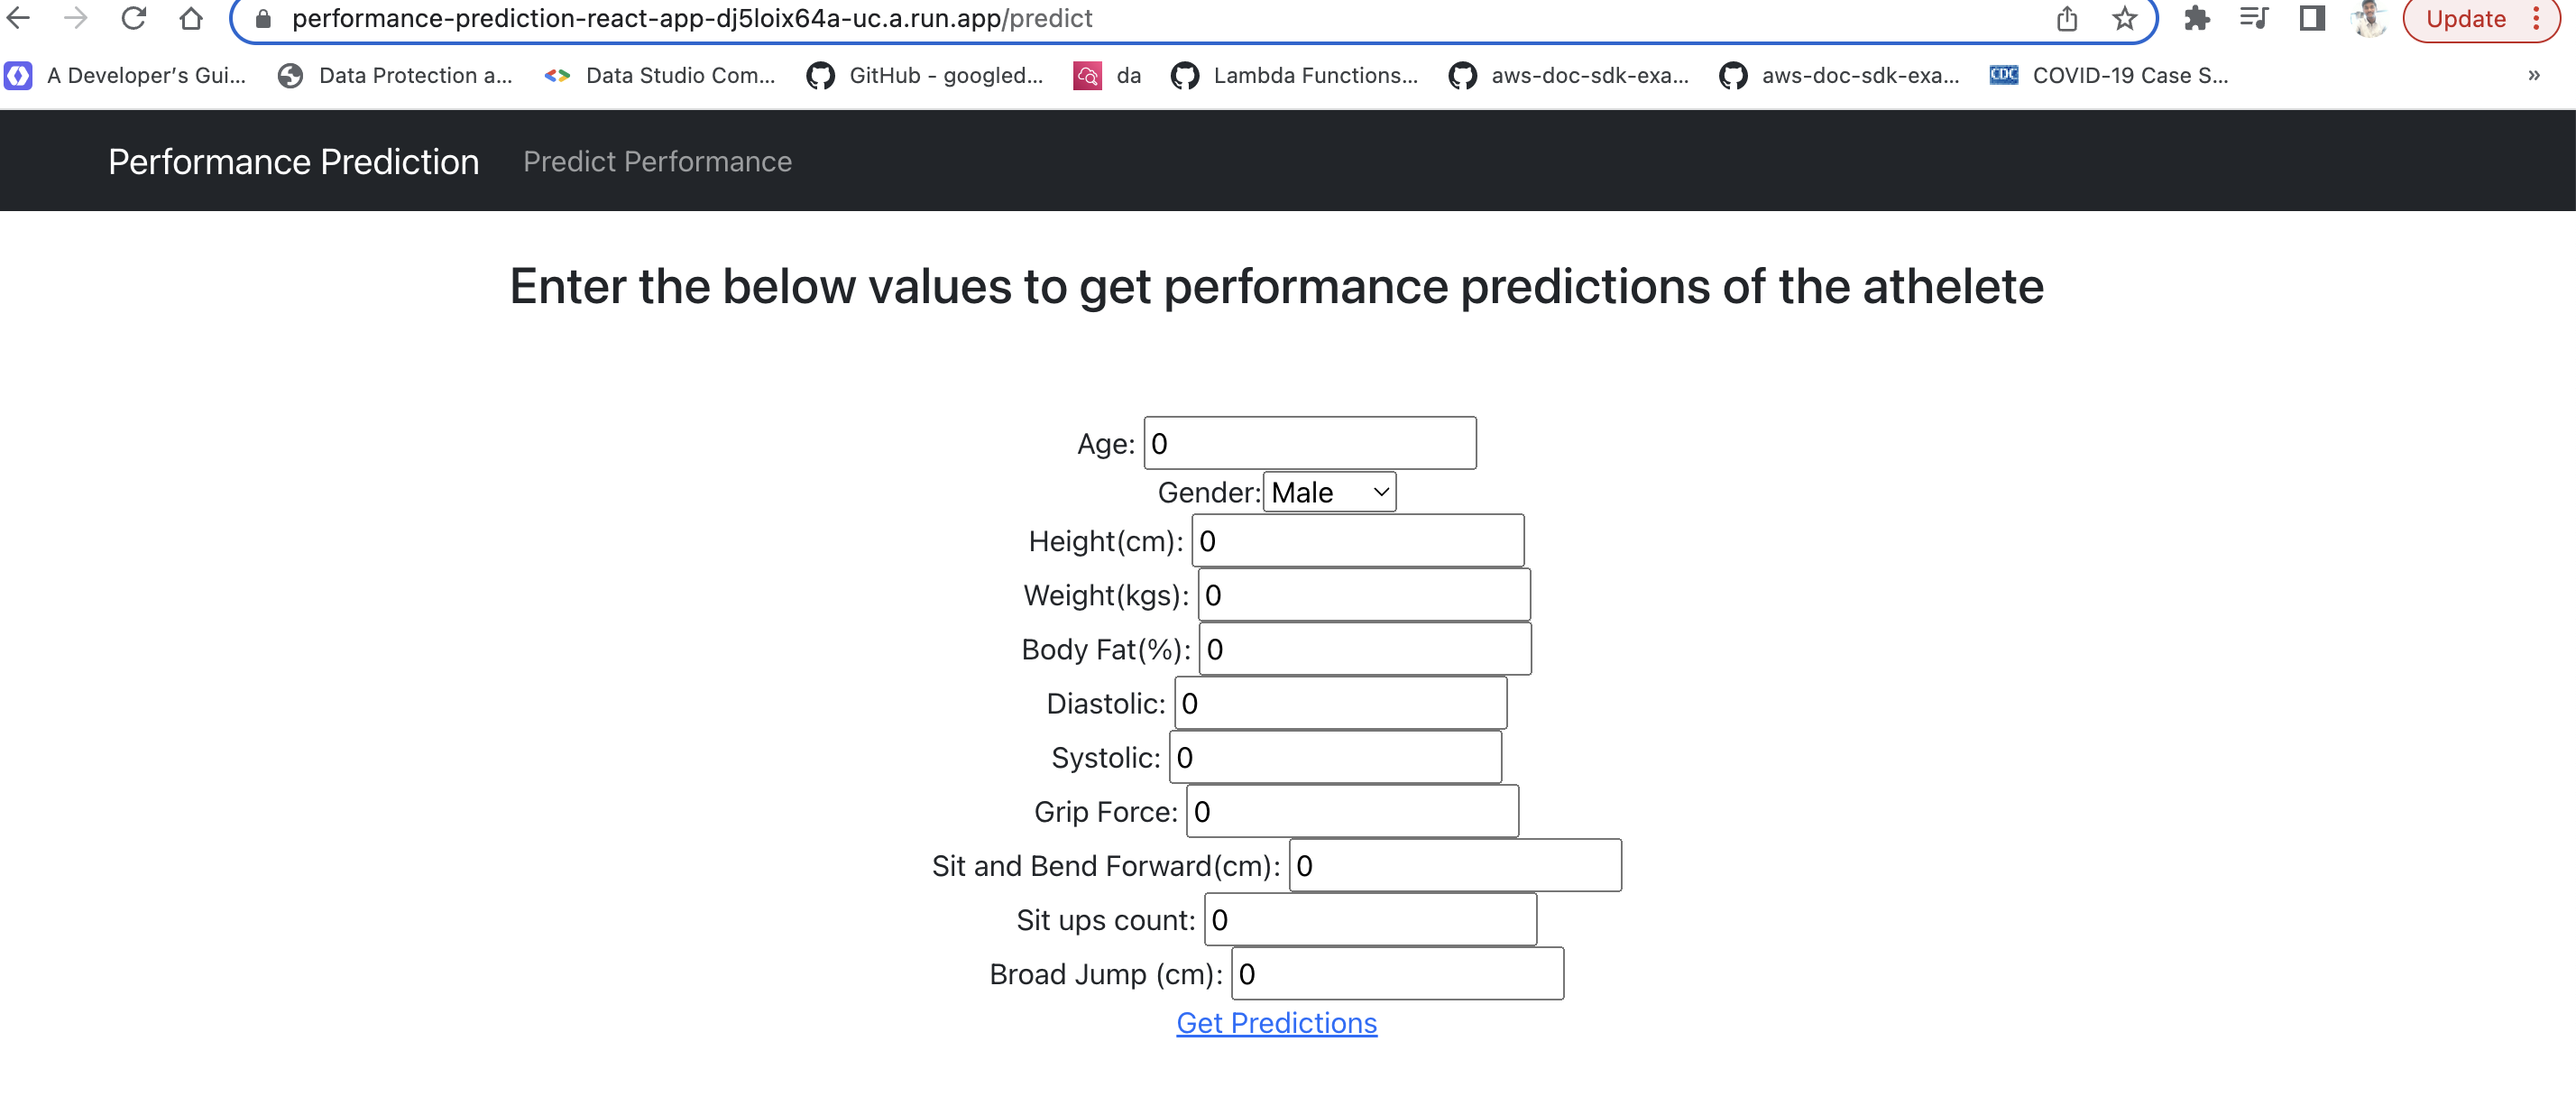


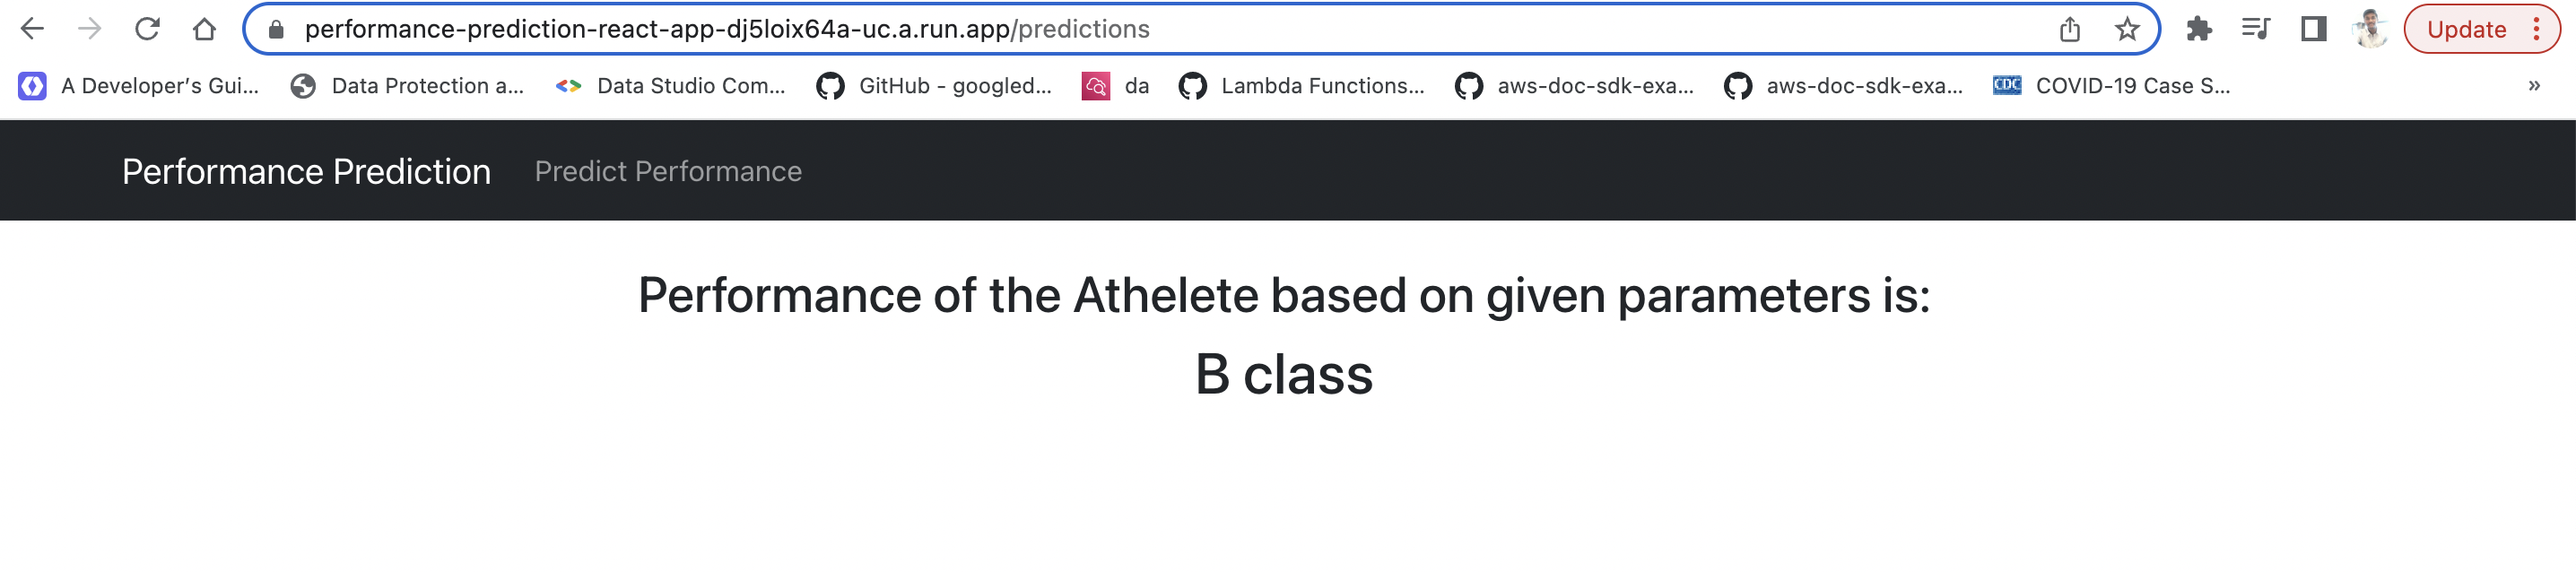


Link for Node Application:
https://prediction-node-app-dj5loix64a-uc.a.run.app

**Git Lab Link for above code:**


---
https://git.cs.dal.ca/chinthirla/sai_chinthirla_b00911631_csci5901.git

The code is present in Project_code folder.


**Step - 14: Deploying model in google cloud using docker**


---

Deployed the model in google cloud run using docker. The dockerfile is present in above git lab link.

Link for deplopyed model:

https://performance-prediction-dj5loix64a-uc.a.run.app

You can test the above link using postman and using link like below:
https://performance-prediction-dj5loix64a-uc.a.run.app/v1/models/performance_prediction_pipeline:predict

It is a post API call and you can use json body as below.

{ 

    "instances": [{"AgeGroup":[0.0],"BodyFatGroup": [0.0], "DiastolicGroup":[1.0], 

                    "age": [37.0],  

                    "body_fat_percent":[30.7], 

                    "broad_jump_cm":[229.0], 

                    "diastolic":[70.0], 

                    "gender_F":[0.0],  

                   "gender_M":[1.0], 

                   "gripForce":[40.4], 

                   "height_cm":[175.0], 

                   "sit-ups_counts":[53.0], 

                   "sit_and_bend_forward_cm":[16.3],  

                   "systolic":[126.0], 

                   "weight_kg" :[65.8]}] 

} 



**Step - 15: Model maintainance Dashboard**


---

For model maintainance dashboard I have used neptune AI where we can have different things like model meta data, live charts for model performance.

Link for Model Maintainance: 

https://app.neptune.ai/saivikaschinthirla/5901-Project/e/PROJ-3/images

Screenshots:

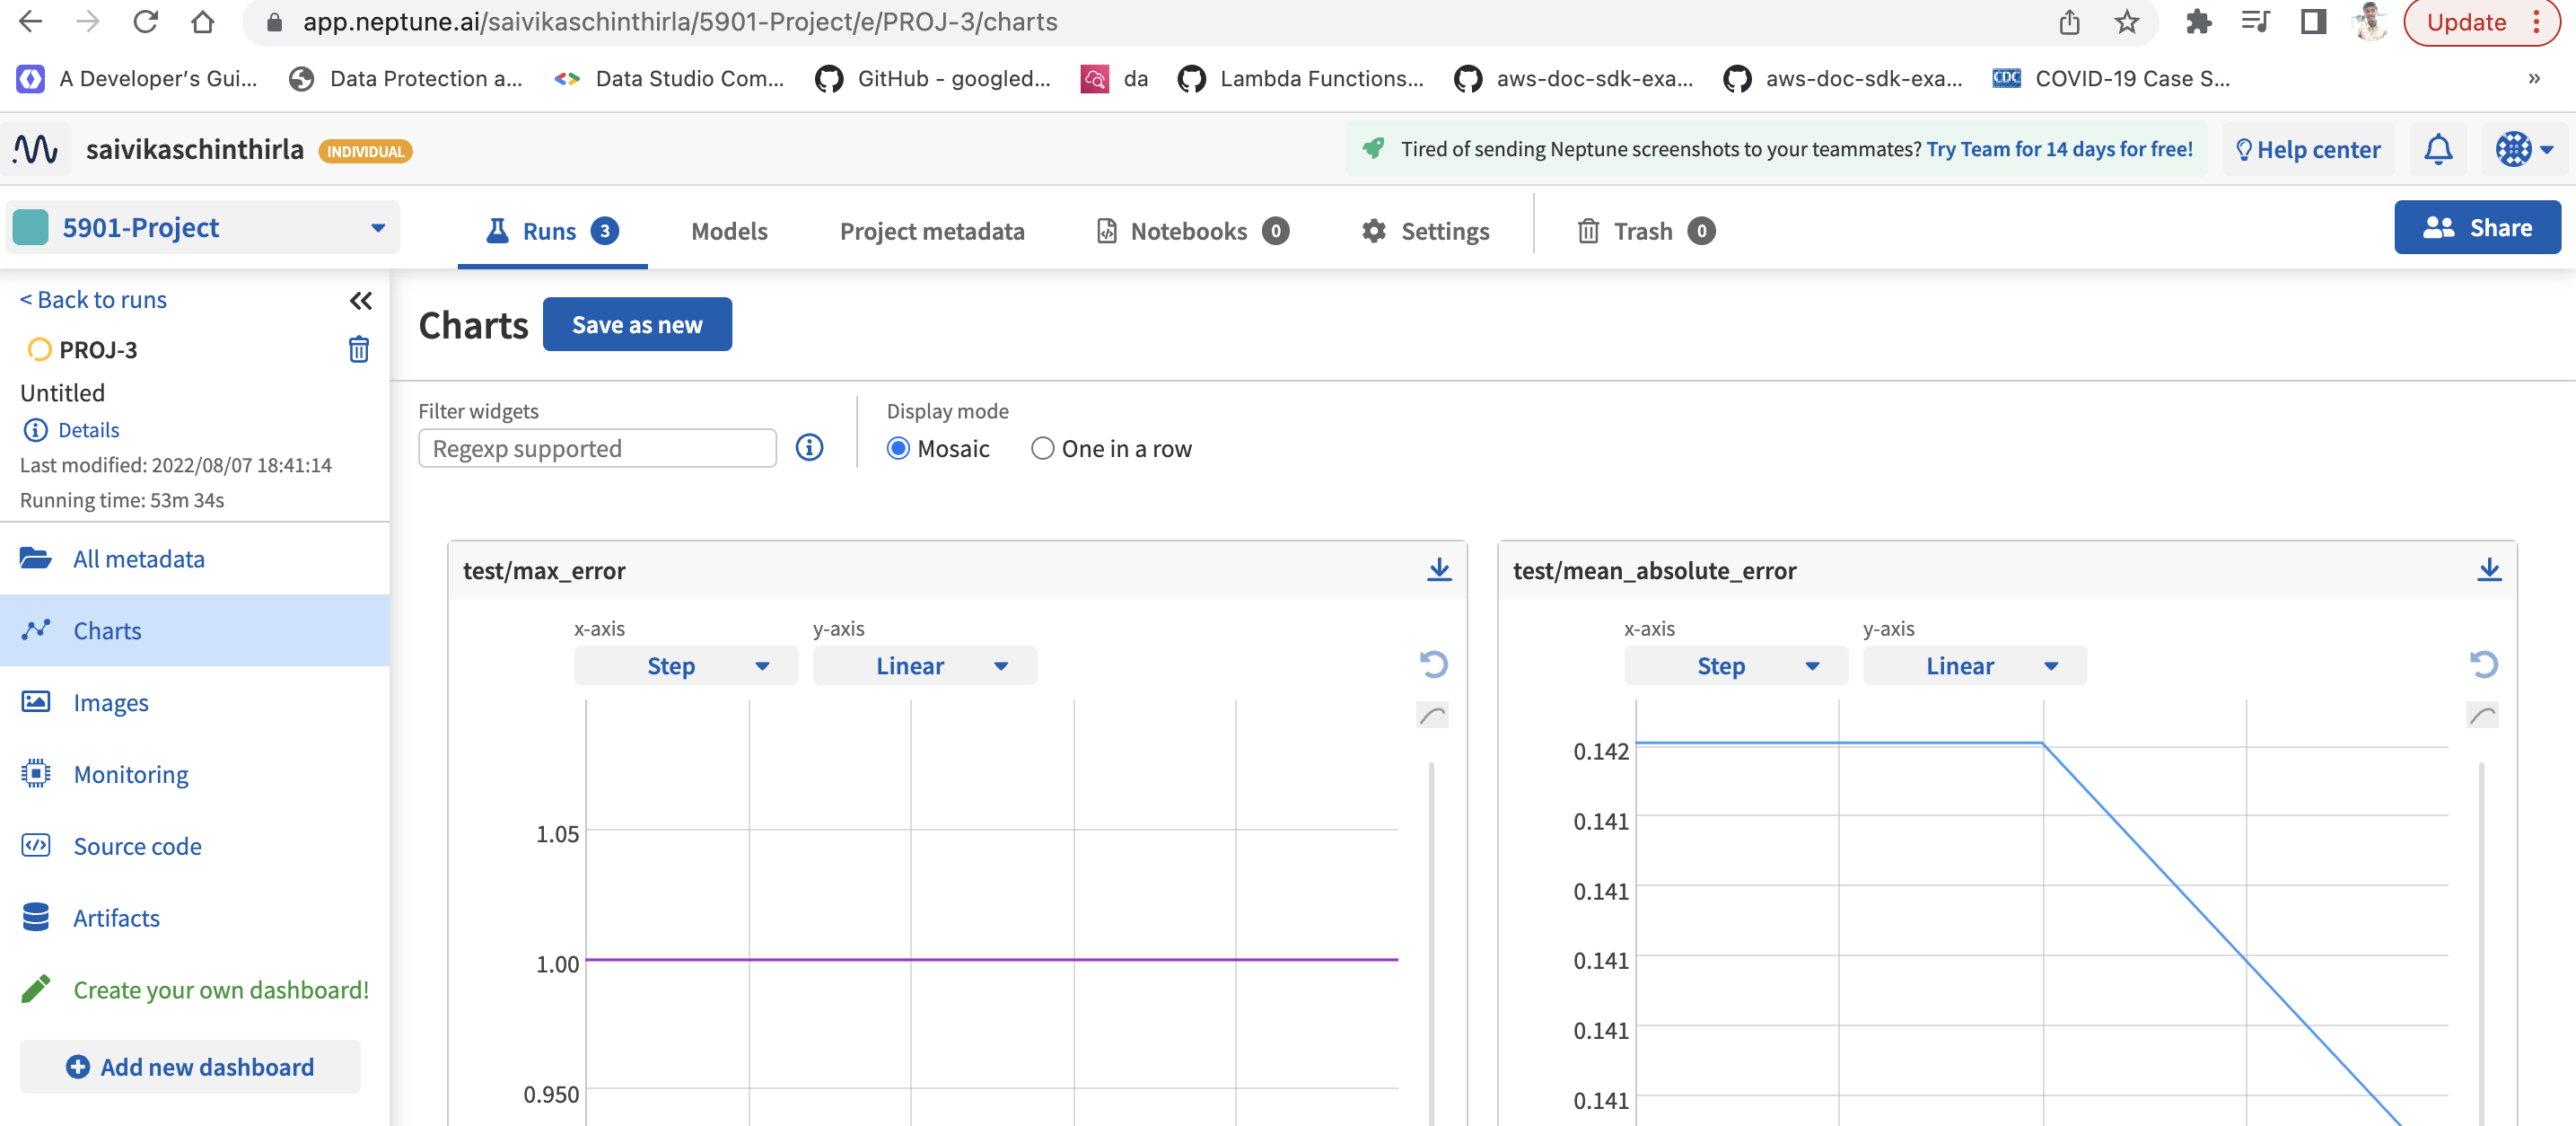

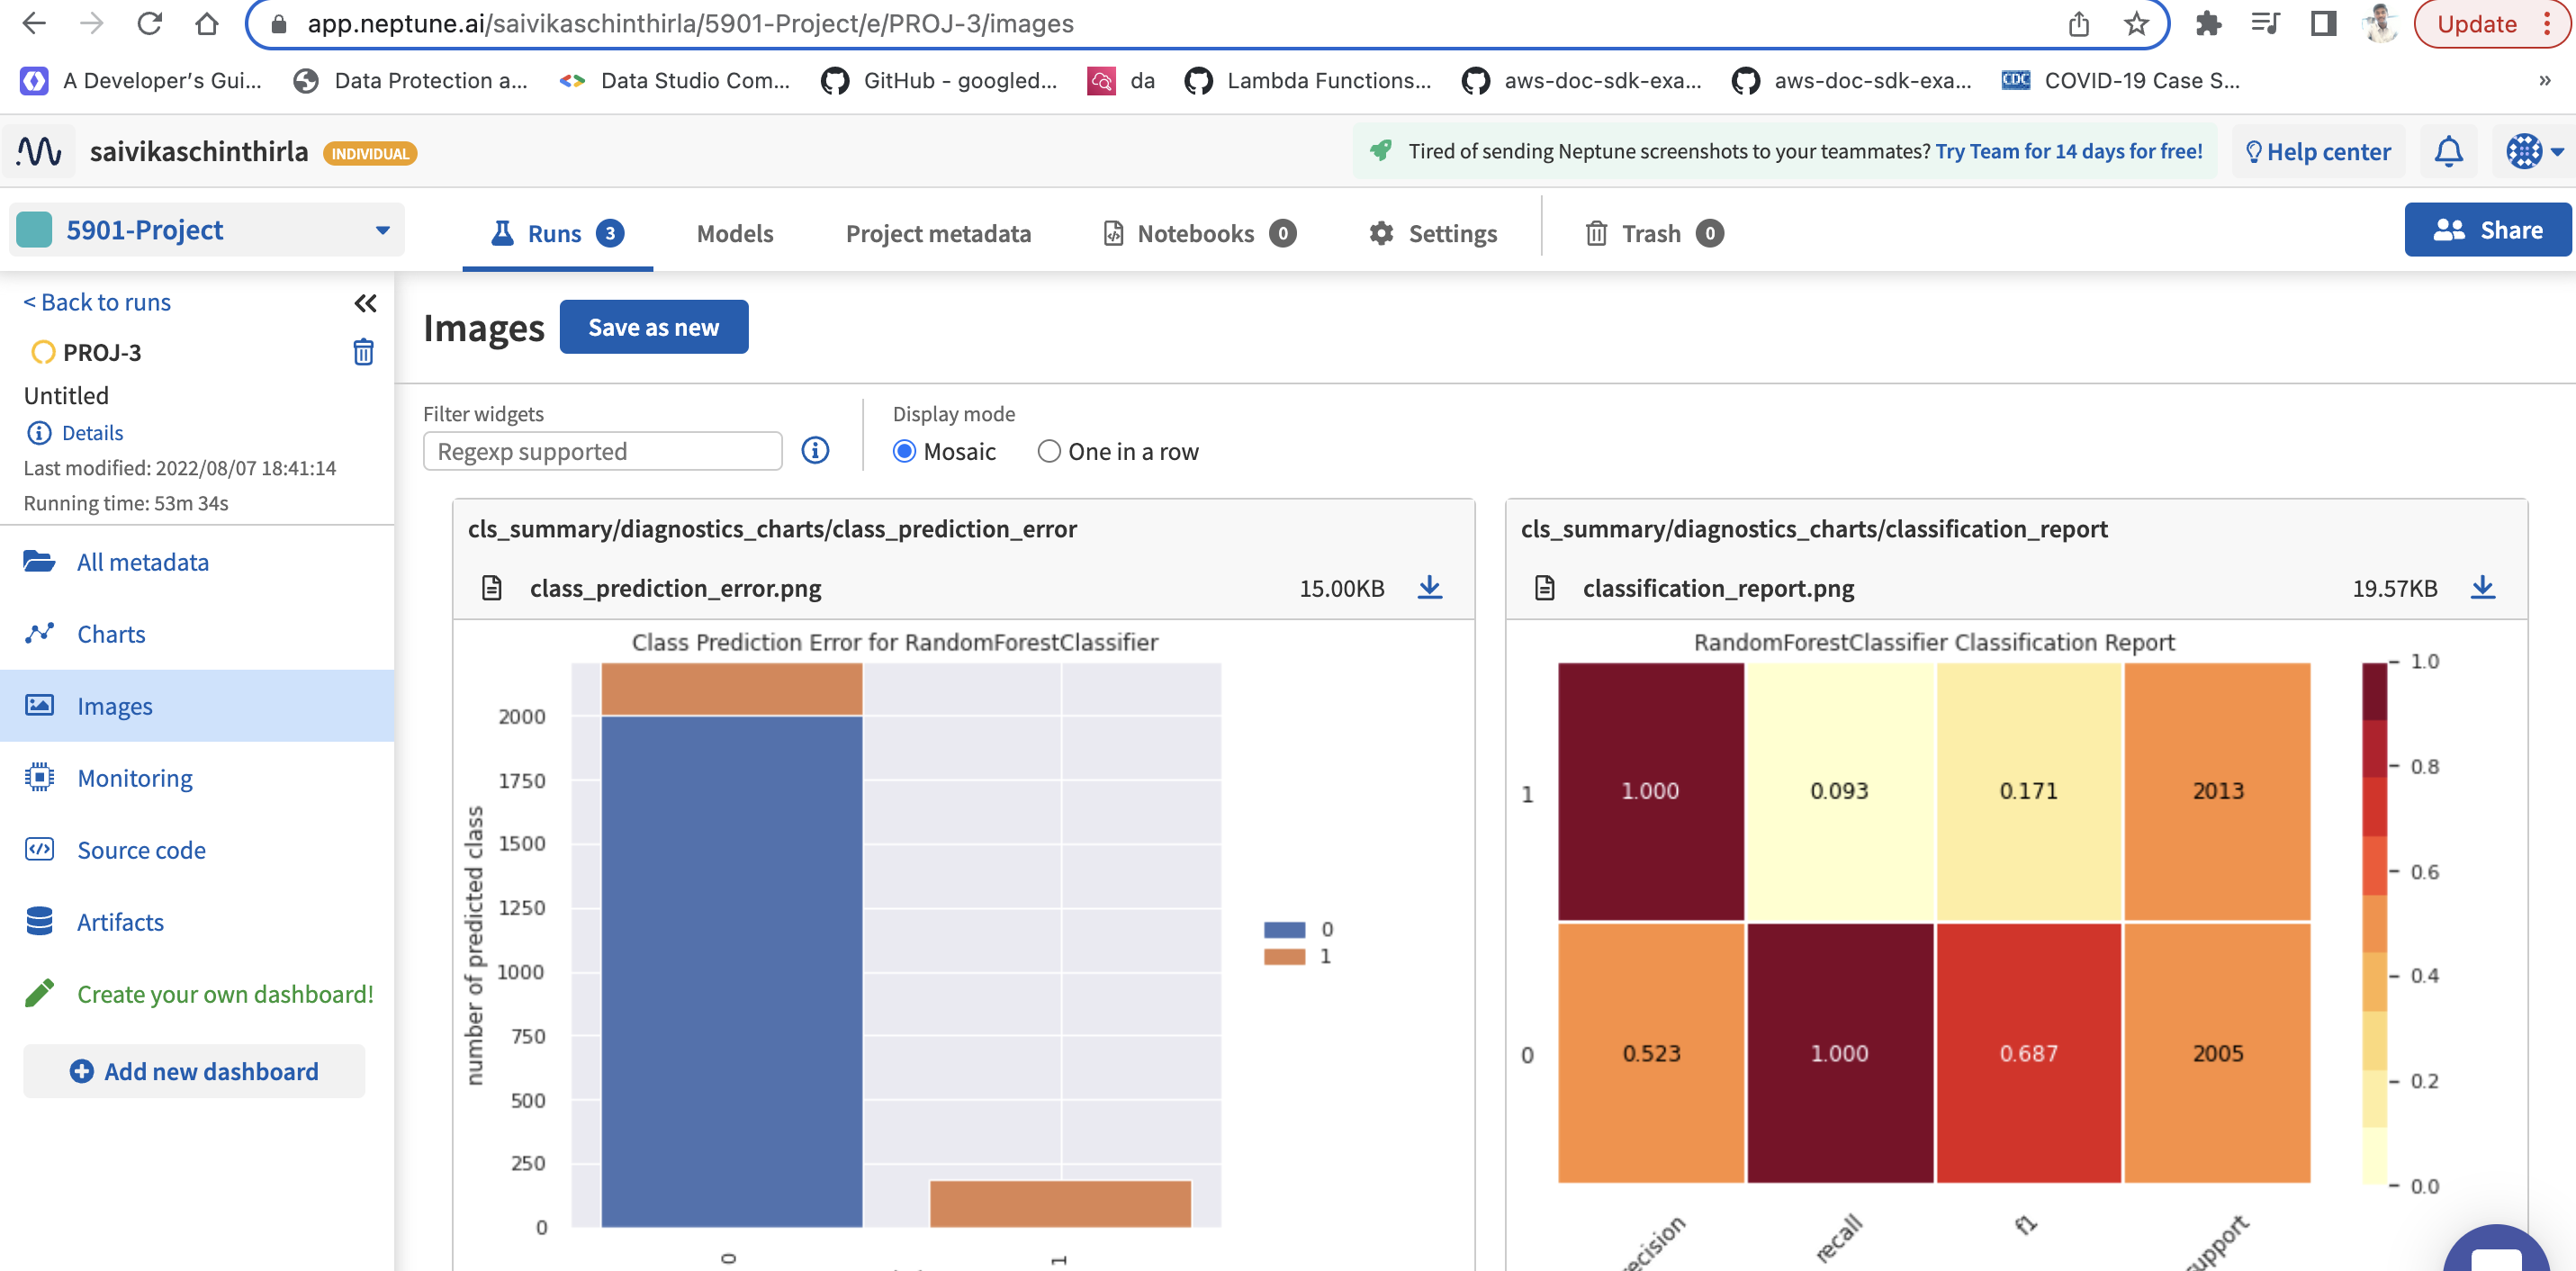

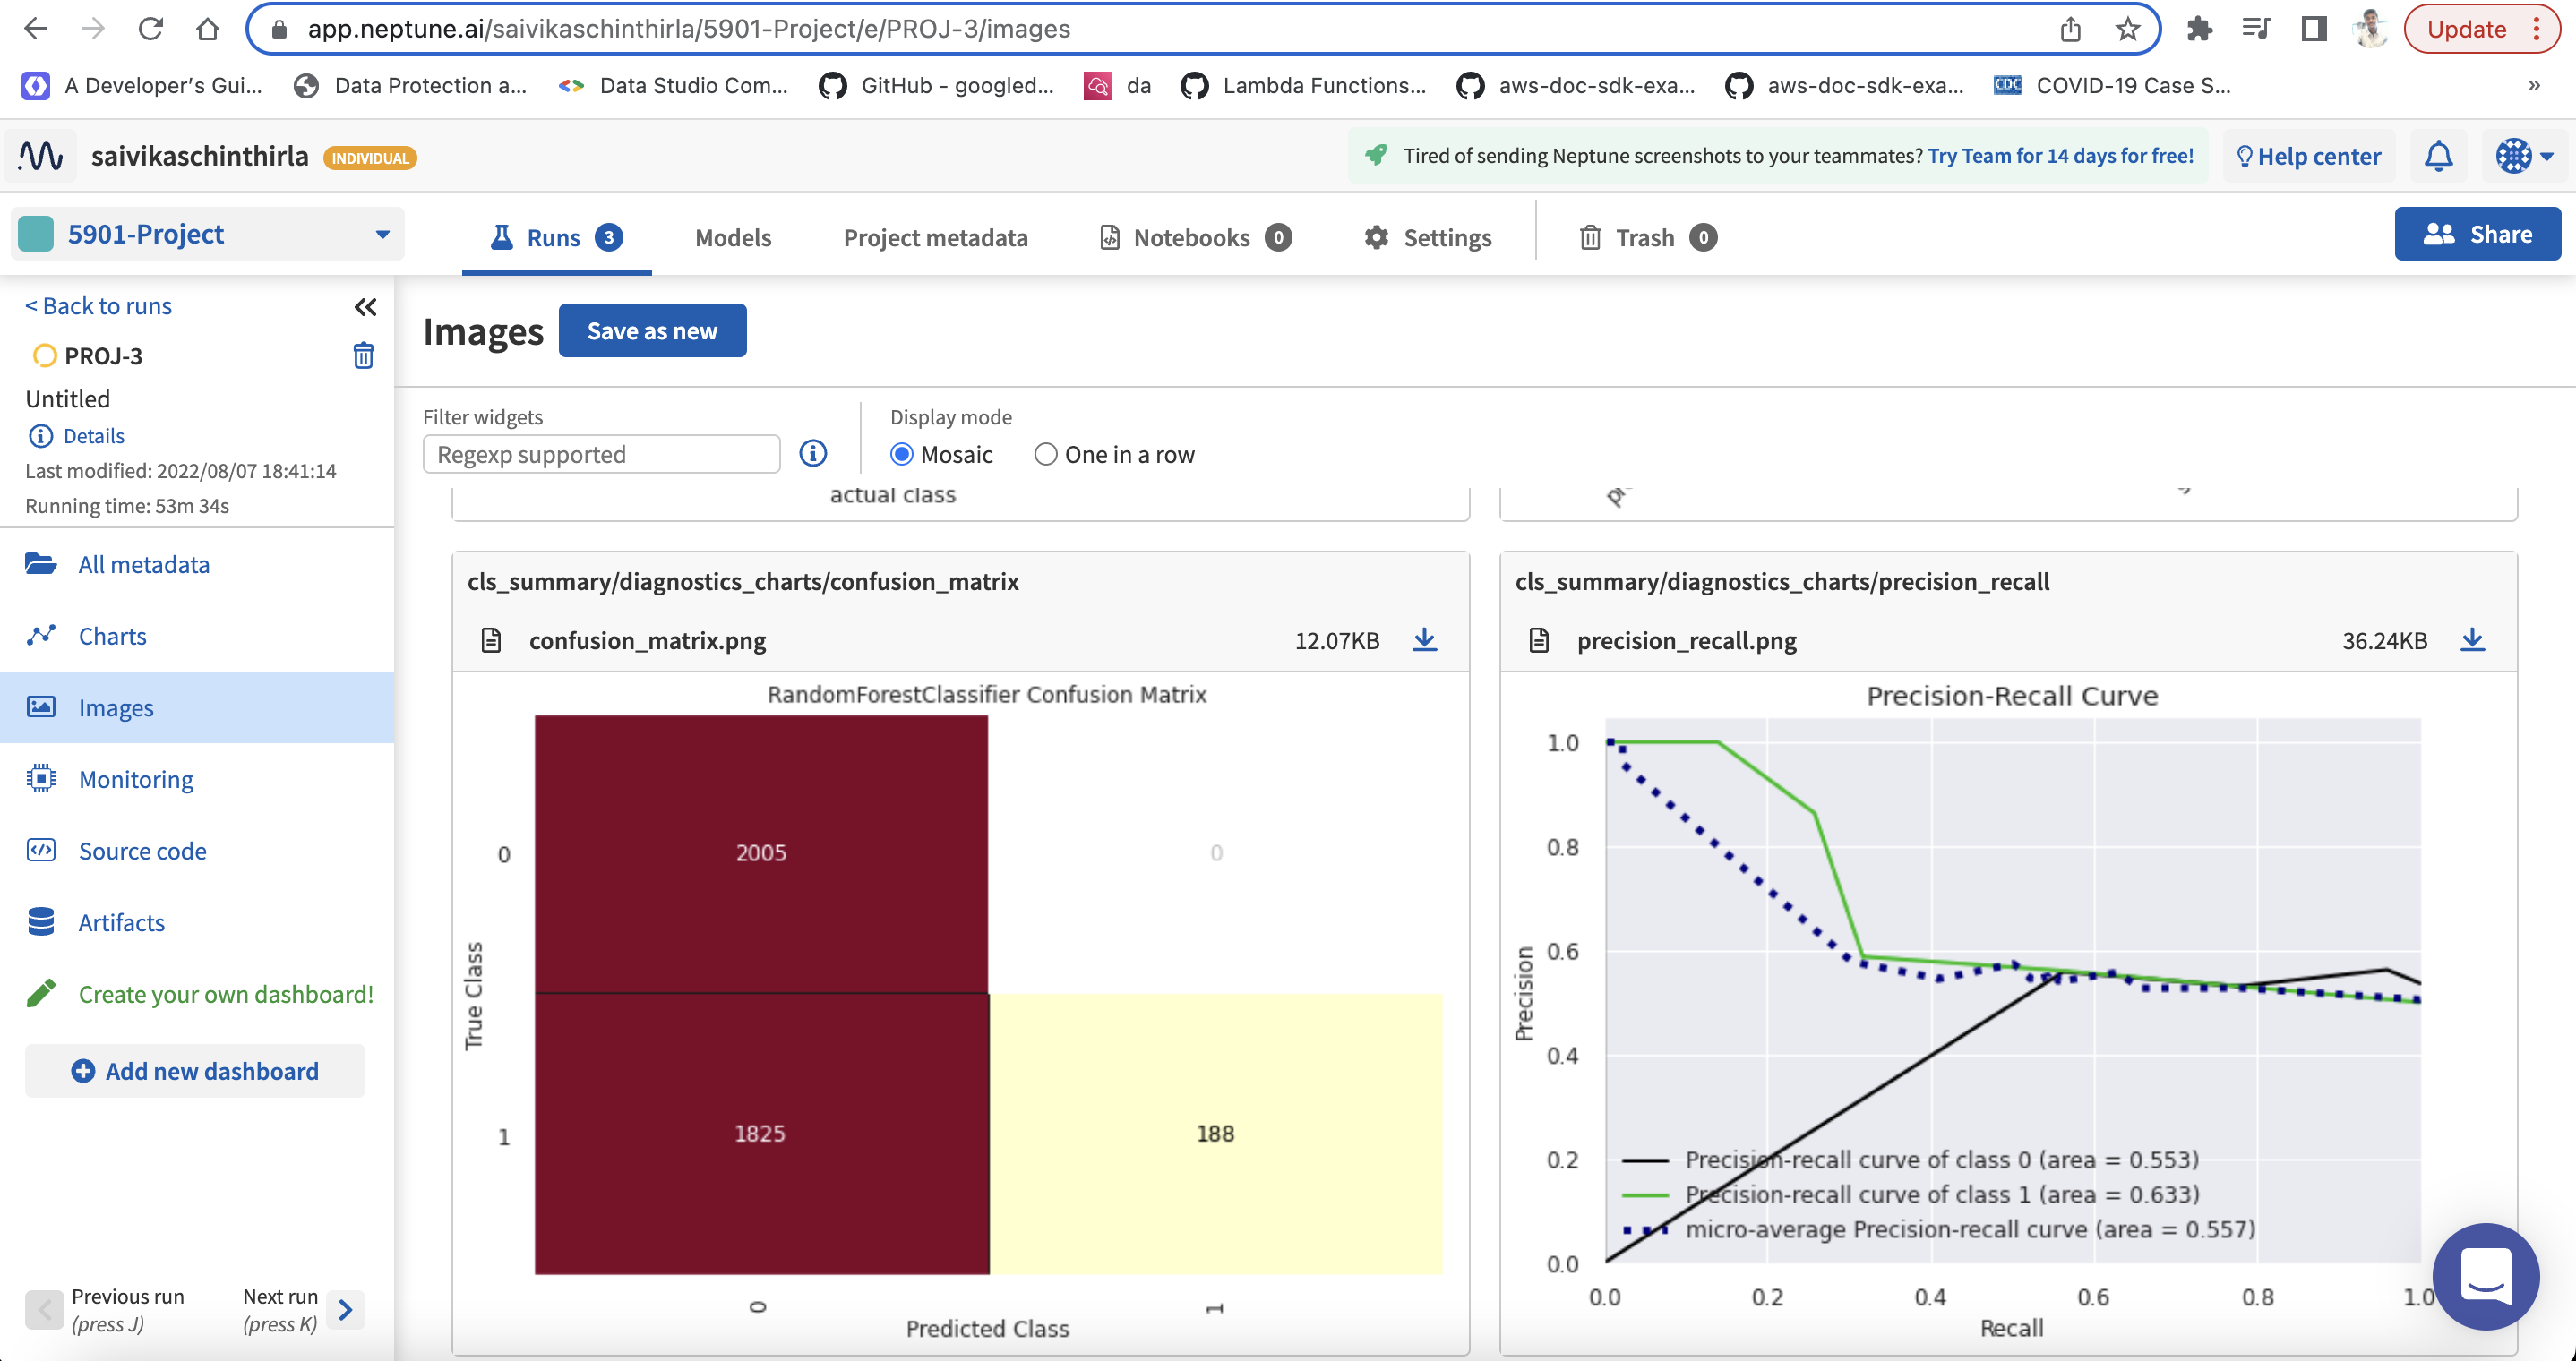

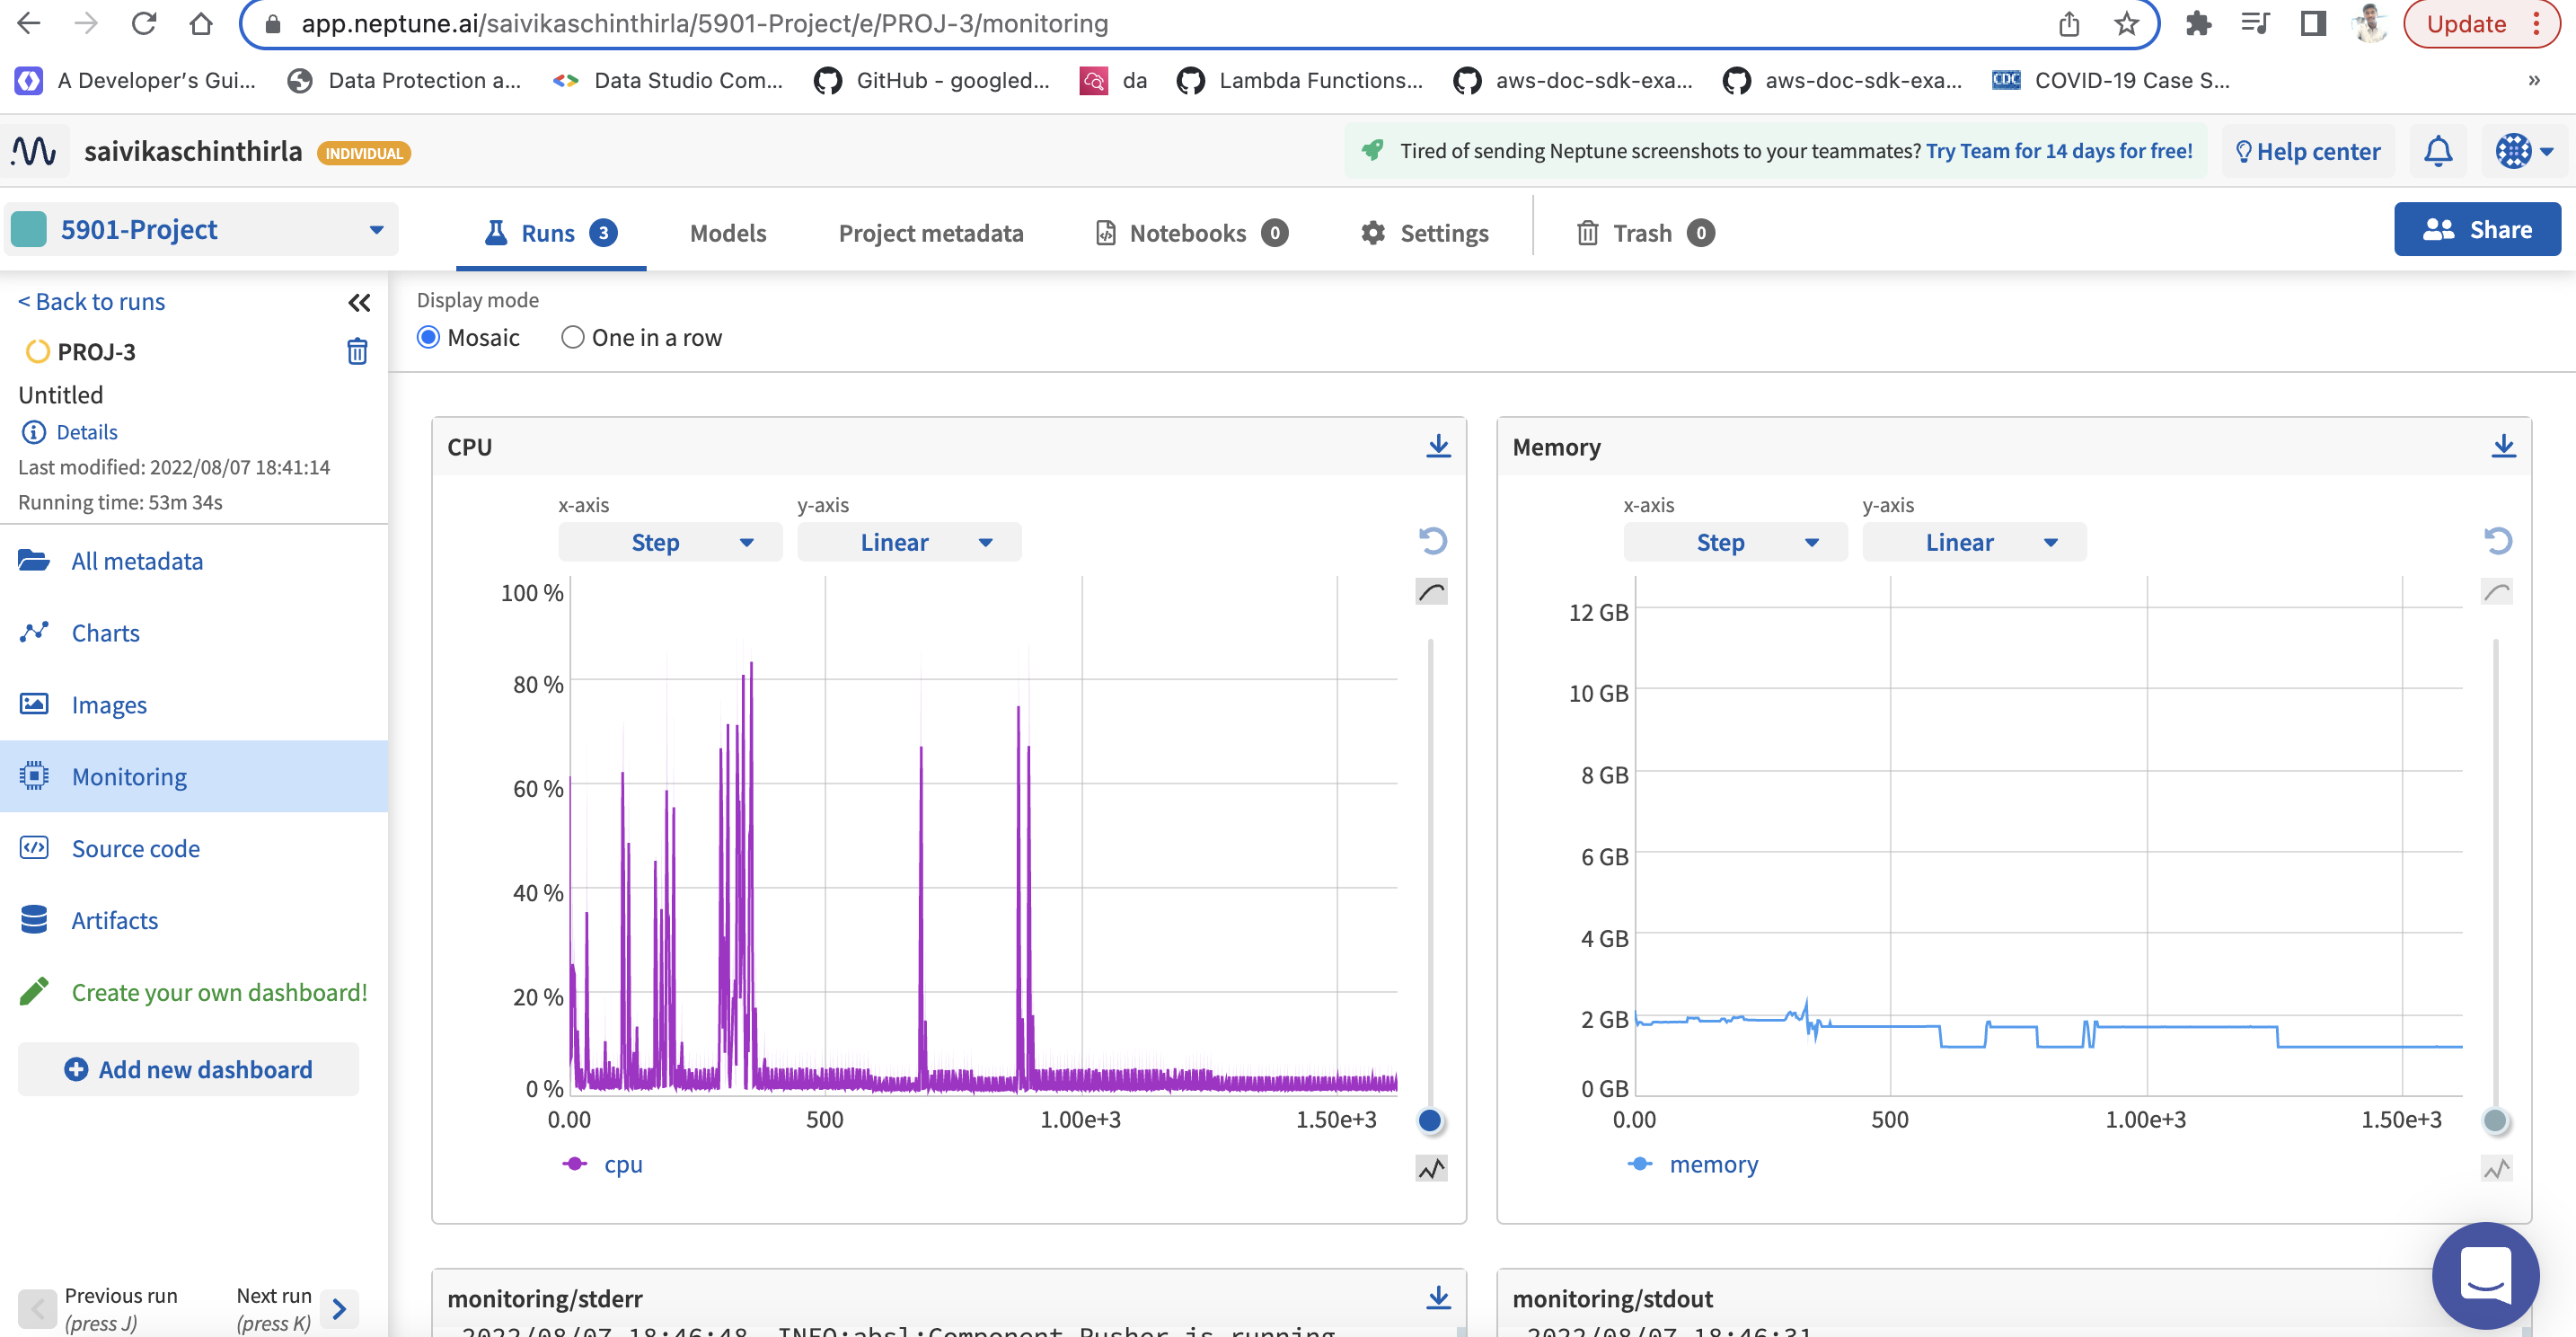